## Background

Walmart is a renowned retail corporation that operates a chain of hypermarkets. Here, Walmart has provided a data combining of 45 stores including store information and monthly sales. The data is provided on weekly basis. Walmart tries to find the impact of holidays on the sales of store. For which it has included four holidays’ weeks into the dataset which are Christmas, Thanksgiving, Super bowl, Labor Day. Here we are owing to Analyze the dataset given. Before doing that, let me point out the objective of this analysis.

## Business Objectives

Our Main Objective is to predict sales of store in a week. As in dataset size and time related data are given as feature, so analyze if sales are impacted by time-based factors and space- based factor. Most importantly how inclusion of holidays in a week soars the sales in store?

## Importing Necessary Libraries and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Importing Datasets

In [ ]:
store=pd.read_csv("/content/stores_data_set.csv")
sales=pd.read_csv("/content/sales_data_set.csv")
Features=pd.read_csv("/content/Features_data_set.csv")

In [ ]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


**Store:** The store number

**Size:** Size of the Store

**Type**: Type of the Store

In [ ]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


**Store:** The store number

**Dept:** Department of the Store

**Date:** Specifying the Week (Friday of every Week)

**Weekly_Sales:** Total Sales Per Week

**IsHoliday:** Whether the week is a special holiday week

In [ ]:
Features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


**Store:** The store number

**Date:** Specifying the Week (Friday of every Week)

**Temperature:** Average temperature in the region (in ℉)

**FuelPrice:** Cost of fuel in the region

**MarkDown1-5:** Anonymized data related to promotional markdowns that Walmart is running.

**CPI:** Consumer price index

**Unemployment:** Unemployment rate

**IsHoliday:** Whether the week is a special holiday week

##merge all indivitual dataset into single dataset

In [ ]:
import pandas as pd

# Merge the first two datasets (Store, Type, Size and Store, Dept, Date, Weekly_Sales, IsHoliday)
merged_store_sales = pd.merge(store, sales, on='Store', how='inner')

# Merge the result with the third dataset (merged_df1_df2 and Store, Date, Temperature, Fuel_Price, etc.)
df= pd.merge(merged_store_sales, Features, on=['Store', 'Date'], how='inner')

# Display the final merged dataset
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [ ]:
#check with dataset shape
df.shape

(421570, 17)

In [ ]:
#check the duplicate columns and removing duplicate columns
df['IsHoliday_x'].isin(df['IsHoliday_y']).all()

True

In [ ]:
df.drop(['IsHoliday_y'], axis=1,inplace=True)
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [ ]:
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,A,151315,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,A,151315,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,A,151315,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


## Looking at Columns

## Store & Department Numbers

In [ ]:
df['Store'].nunique() # number of different values

45

In [ ]:
df['Dept'].nunique() # number of different values

81

Now, I will look at the average weekly sales for each store and each department to see if there is any weird values or not. There are 45 stores and 81 departments for stores.

In [ ]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


Store numbers begin from 1 to 45, department numbers are from 1 to 99, but some numbers are missing such as there is no 88 or 89 etc. Total number of departments is 81.

From the pivot table, it is obviously seen that there are some wrong values such as there are 0 and minus values for weekly sales. But sales amount can not be minus. Also, it is impossible for one department not to sell anything whole week. So, I will change this values.

In [ ]:
df.loc[df['Weekly_Sales']<=0]

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
188,1,A,151315,47,19/02/2010,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
406,1,A,151315,47,12/03/2010,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106
2549,1,A,151315,47,08/10/2010,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838
3632,1,A,151315,54,21/01/2011,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742
4132,1,A,151315,47,11/03/2011,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,B,118221,49,25/05/2012,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567
420403,45,B,118221,49,29/06/2012,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567
420736,45,B,118221,49,03/08/2012,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684
421007,45,B,118221,54,31/08/2012,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684


1358 rows in 421570 rows means 0.3%, so I can delete and ignore these rows which contains wrong sales values.

In [ ]:
df = df.loc[df['Weekly_Sales'] > 0]
df.shape

(420212, 16)

##Date columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Type          420212 non-null  object 
 2   Size          420212 non-null  int64  
 3   Dept          420212 non-null  int64  
 4   Date          420212 non-null  object 
 5   Weekly_Sales  420212 non-null  float64
 6   IsHoliday     420212 non-null  bool   
 7   Temperature   420212 non-null  float64
 8   Fuel_Price    420212 non-null  float64
 9   MarkDown1     150181 non-null  float64
 10  MarkDown2     110904 non-null  float64
 11  MarkDown3     136651 non-null  float64
 12  MarkDown4     134518 non-null  float64
 13  MarkDown5     150929 non-null  float64
 14  CPI           420212 non-null  float64
 15  Unemployment  420212 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.7+ MB


date columns is object tipe so need to change datetime dtypes

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

In [ ]:
df['Date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 420212 entries, 0 to 421569
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
420212 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.4 MB


In [ ]:
df['Date'].head(5).append(df['Date'].tail(5))

<ipython-input-247-359e535bb597>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df['Date'].head(5).append(df['Date'].tail(5))


0        2010-02-05
1        2010-02-05
2        2010-02-05
3        2010-02-05
4        2010-02-05
421565   2012-10-26
421566   2012-10-26
421567   2012-10-26
421568   2012-10-26
421569   2012-10-26
Name: Date, dtype: datetime64[ns]

Our data is from 5th of February 2010 to 26th of October 2012.  

## IsHoliday column

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

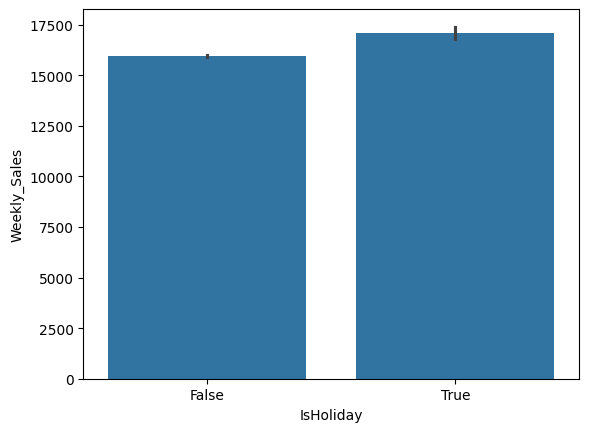

In [ ]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)

In [ ]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique()

array(['2010-02-12T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2012-09-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique()

133

All holidays are not in the data. There are 4 holiday values such as;

**Super Bowl**: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

**Labor Day:** 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

**Thanksgiving:** 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

**Christmas:** 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


After the 07-Sep-2012 holidays are in test set for prediction. When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.

I want to see differences between holiday types. So, I create new columns for 4 types of holidays and fill them with boolean values. If date belongs to this type of holiday it is True, if not False.

In [ ]:
df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,A,151315,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,A,151315,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,A,151315,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,B,118221,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,B,118221,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,B,118221,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [ ]:
df['IsHoliday'].value_counts()

False    390652
True      29560
Name: IsHoliday, dtype: int64

In [ ]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [ ]:
# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [ ]:
# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [ ]:
#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

In [ ]:
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,False,False,False
1,1,A,151315,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,False,False,False
2,1,A,151315,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,False,False,False
3,1,A,151315,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,False,False,False
4,1,A,151315,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,False,False,False


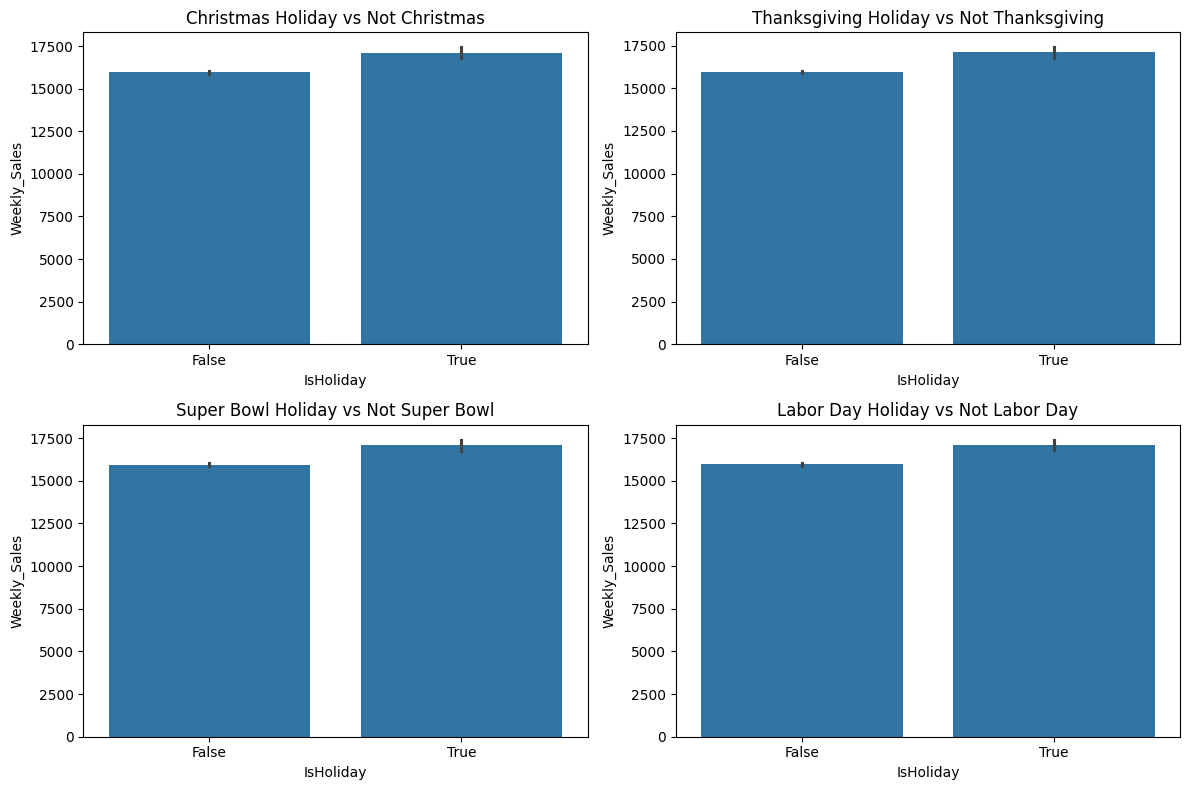

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot Christmas
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Christmas Holiday vs Not Christmas')

# Plot Thanksgiving
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Thanksgiving Holiday vs Not Thanksgiving')

# Plot Super Bowl
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Super Bowl Holiday vs Not Super Bowl')

# Plot Labor Day
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Labor Day Holiday vs Not Labor Day')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


It is shown that for the graphs, Labor Day and Christmas do not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the Thanksgiving. I think, people generally prefer to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week. And, there is Black Friday sales in the Thanksgiving week.

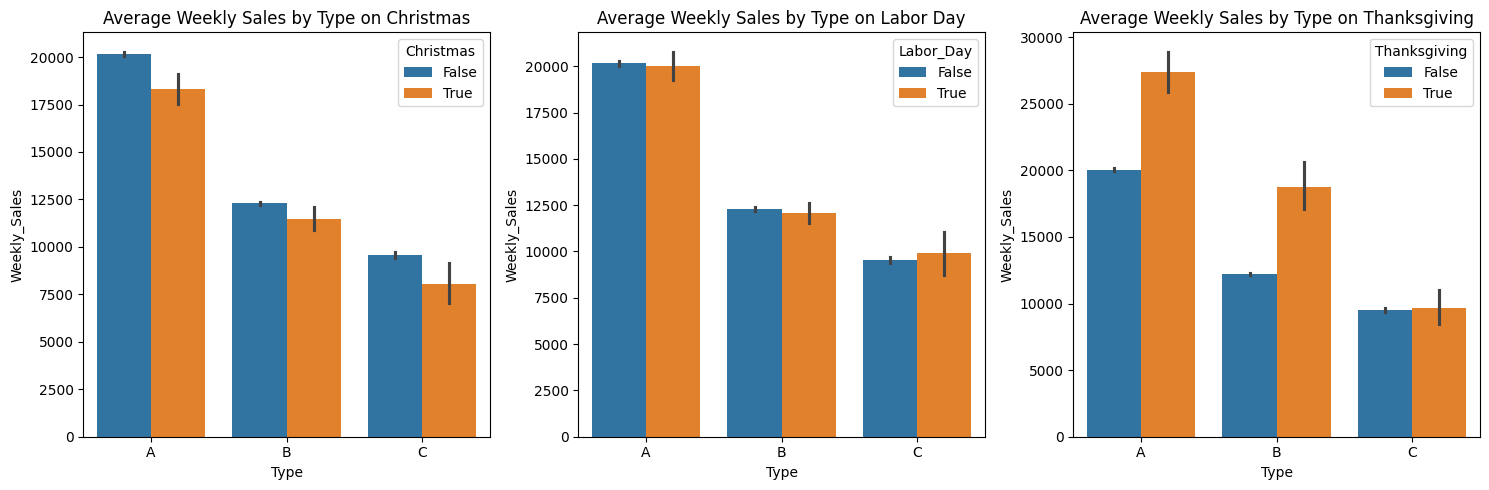

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot average weekly sales for types on Christmas
sns.barplot(x='Type', y='Weekly_Sales', hue='Christmas', data=df, ax=axes[0])
axes[0].set_title('Average Weekly Sales by Type on Christmas')

# Plot average weekly sales for types on Labor Day
sns.barplot(x='Type', y='Weekly_Sales', hue='Labor_Day', data=df, ax=axes[1])
axes[1].set_title('Average Weekly Sales by Type on Labor Day')

# Plot average weekly sales for types on Thanksgiving
sns.barplot(x='Type', y='Weekly_Sales', hue='Thanksgiving', data=df, ax=axes[2])
axes[2].set_title('Average Weekly Sales by Type on Thanksgiving')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


It is seen from the graph that, highest sale average is in the Thanksgiving week between holidays. And, for all holidays Type A stores has highest sales.

In [ ]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas
90645,10,B,126512,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,False,False,True,False
337053,35,B,103681,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,False,False,True,False
94393,10,B,126512,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,False,False,True,False
333594,35,B,103681,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,False,False,True,False
131088,14,A,200898,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,False,False,True,False


Also, it is not surprise that top 5 highest weekly sales are belongs to Thanksgiving weeks.

# Markdown Columns

In [ ]:
df.isna().sum()

Store                0
Type                 0
Size                 0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64

Walmart gave markdown columns to see the effect if markdowns on sales. When I check columns, there are many NaN values for markdowns. I decided to change them with 0, because if there is markdown in the row, it is shown with numbres. So, if I can write 0, it shows there is no markdown at that date.

In [ ]:
for i in range(1,6):
  df["MarkDown"+str(i)] = df["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  df["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [ ]:
df.isna().sum()

Store           0
Type            0
Size            0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

In [ ]:
df.describe() # to see weird statistical things

,Store,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,136749.732787,44.241309,16033.114591,60.090599,3.360890,2590.323565,879.000487,468.851229,1083.534361,1662.805002,171.212496,7.960000
std,12.787236,60993.084568,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.910278,5534.069398,3896.068938,4206.209357,39.162445,1.863879
min,1.000000,34875.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,3.879000
25%,11.000000,93638.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000
50%,22.000000,140167.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000
75%,33.000000,202505.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000
max,45.000000,219622.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


Minimum value for weekly sales is 0.01. Most probably, this value is not true but I prefer not to change them now. Because, there are many departments and many stores. It takes too much time to check each department for each store (45 store for 81 departments). So, I take averages for EDA.

# Feature engineering

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week

<ipython-input-270-6988f315599e>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Date'].dt.week


In [ ]:
df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,...,MarkDown5,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Year,Month,Week
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,0.00,...,0.00,211.096358,8.106,False,False,False,False,2010,2,5
1,1,A,151315,2,2010-02-05,50605.27,False,42.31,2.572,0.00,...,0.00,211.096358,8.106,False,False,False,False,2010,2,5
2,1,A,151315,3,2010-02-05,13740.12,False,42.31,2.572,0.00,...,0.00,211.096358,8.106,False,False,False,False,2010,2,5
3,1,A,151315,4,2010-02-05,39954.04,False,42.31,2.572,0.00,...,0.00,211.096358,8.106,False,False,False,False,2010,2,5
4,1,A,151315,5,2010-02-05,32229.38,False,42.31,2.572,0.00,...,0.00,211.096358,8.106,False,False,False,False,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,...,858.33,192.308899,8.667,False,False,False,False,2012,10,43
421566,45,B,118221,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,...,858.33,192.308899,8.667,False,False,False,False,2012,10,43
421567,45,B,118221,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,...,858.33,192.308899,8.667,False,False,False,False,2012,10,43
421568,45,B,118221,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,...,858.33,192.308899,8.667,False,False,False,False,2012,10,43


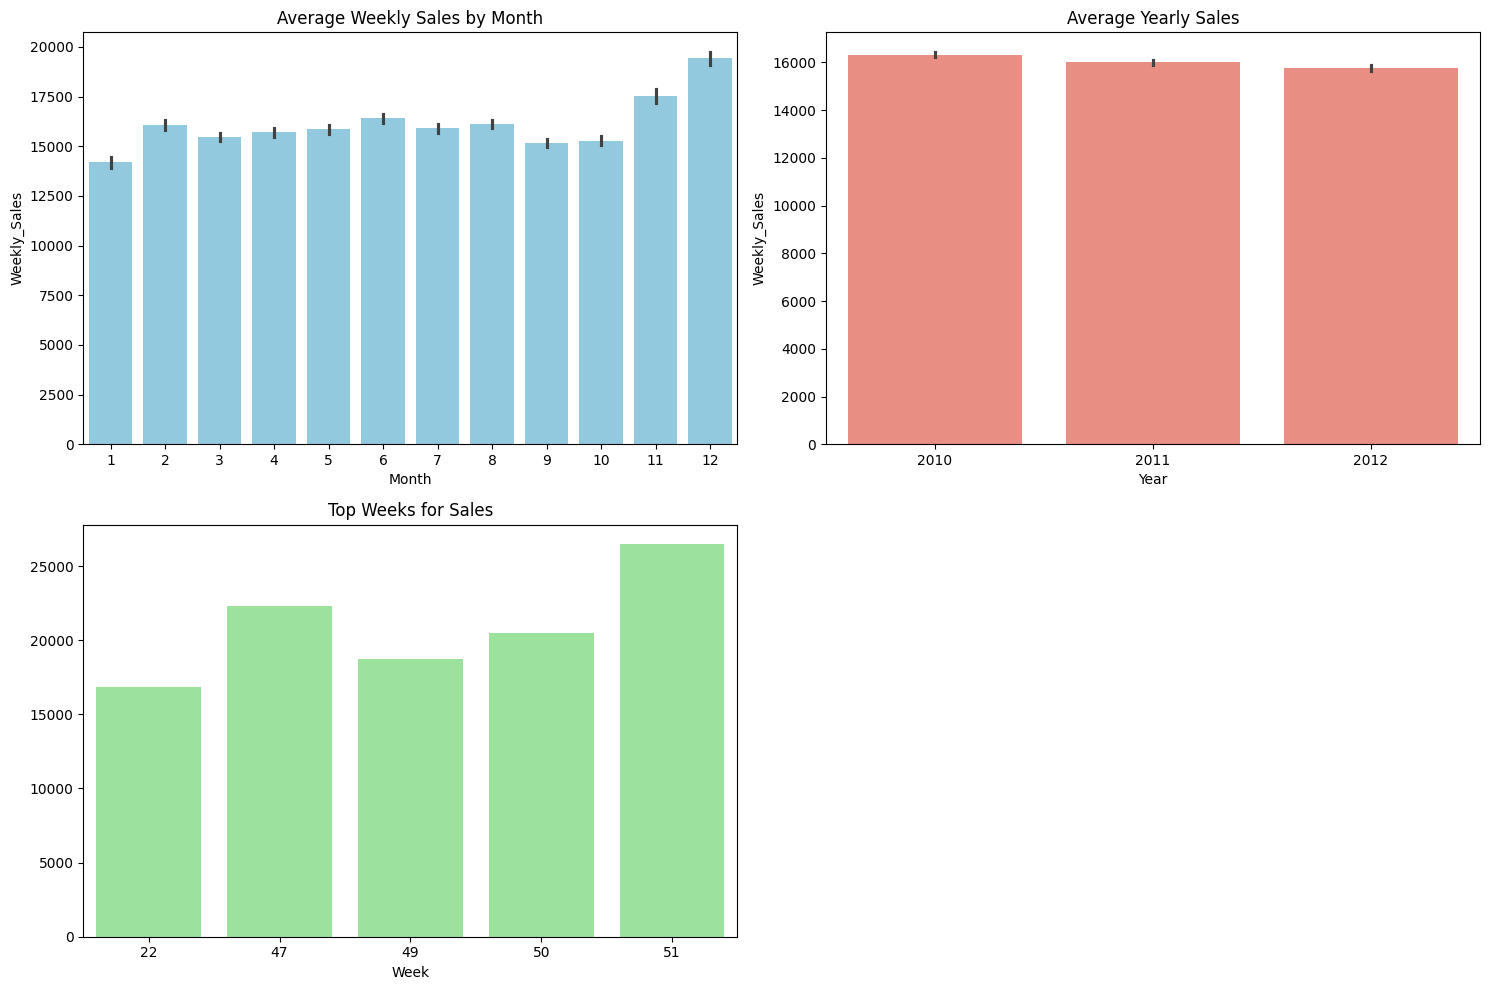

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot average weekly sales by month with color
sns.barplot(x='Month', y='Weekly_Sales', data=df, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Average Weekly Sales by Month')

# Plot average yearly sales with color
sns.barplot(x='Year', y='Weekly_Sales', data=df, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Average Yearly Sales')

# Plot top weeks for sales with color
weekly_sales_top = df.groupby('Week')['Weekly_Sales'].mean().sort_values(ascending=False).head()
sns.barplot(x=weekly_sales_top.index, y=weekly_sales_top.values, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Top Weeks for Sales')

# Hide empty subplot
axes[1, 1].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

When we look at the graph above, the best sales are in December and November, as expected. The highest values are belongs to Thankgiving holiday but when we take average it is obvious that December has the best value.

Top 5 sales averages by weekly belongs to 1-2 weeks before Christmas, Thanksgiving, Black Friday and end of May, when the schools are closed.

From graphs, it is seen that 51th week and 47th weeks have significantly higher averages as Christmas, Thankgiving and Black Friday effects.

# Fuel Price, CPI , Unemployment , Temperature Effects


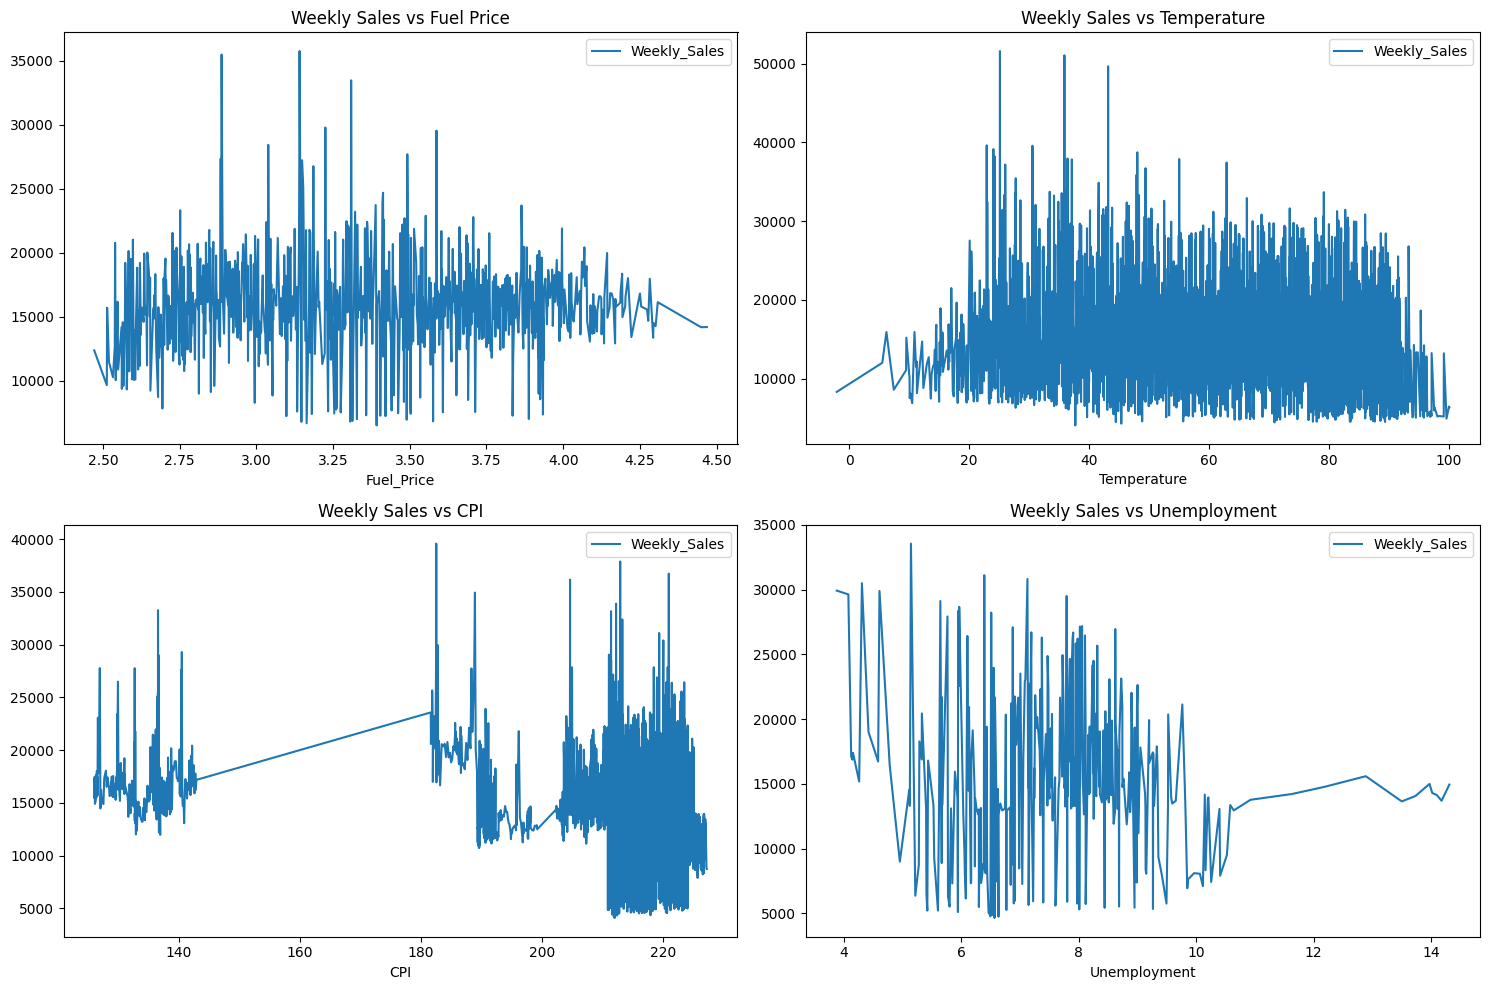

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot fuel price
fuel_price = pd.pivot_table(df, values="Weekly_Sales", index="Fuel_Price")
fuel_price.plot(ax=axes[0, 0])
axes[0, 0].set_title('Weekly Sales vs Fuel Price')

# Plot temperature
temp = pd.pivot_table(df, values="Weekly_Sales", index="Temperature")
temp.plot(ax=axes[0, 1])
axes[0, 1].set_title('Weekly Sales vs Temperature')

# Plot CPI
CPI = pd.pivot_table(df, values="Weekly_Sales", index="CPI")
CPI.plot(ax=axes[1, 0])
axes[1, 0].set_title('Weekly Sales vs CPI')

# Plot unemployment
unemployment = pd.pivot_table(df, values="Weekly_Sales", index="Unemployment")
unemployment.plot(ax=axes[1, 1])
axes[1, 1].set_title('Weekly Sales vs Unemployment')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


From graphs, it is seen that there are no significant patterns between CPI, temperature, unemployment rate, fuel price vs weekly sales. There is no data for CPI between 140-180 also.

In [ ]:
# Save the original DataFrame to a CSV file
df.to_csv('original_dataframe.csv', index=False)

In [ ]:
df1=df.copy()

In [ ]:
df1.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Super_Bowl',
       'Labor_Day', 'Thanksgiving', 'Christmas', 'Year', 'Month', 'Week'],
      dtype='object')

In [ ]:
df1['IsHoliday'] = np.where((df1['IsHoliday']==True) & (df1['Super_Bowl'] == True ), 'Super Bowl',
                                    np.where((df1['IsHoliday']==True) & (df1['Labor_Day'] == True), 'Labor Day',
                                    np.where((df1['IsHoliday']==True) & (df1['Thanksgiving'] == True), 'Thanksgiving',
                                    np.where((df1['IsHoliday']==True) & (df1['Christmas'] == True), 'Christmas',  'No Holiday'))))
df1['IsHoliday'].value_counts()

No Holiday      390652
Super Bowl        8873
Labor Day         8832
Thanksgiving      5946
Christmas         5909
Name: IsHoliday, dtype: int64

In [ ]:
df1.drop(columns=['Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas'], inplace=True)

In [ ]:
df1

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week
0,1,A,151315,1,2010-02-05,24924.50,No Holiday,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5
1,1,A,151315,2,2010-02-05,50605.27,No Holiday,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5
2,1,A,151315,3,2010-02-05,13740.12,No Holiday,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5
3,1,A,151315,4,2010-02-05,39954.04,No Holiday,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5
4,1,A,151315,5,2010-02-05,32229.38,No Holiday,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,93,2012-10-26,2487.80,No Holiday,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43
421566,45,B,118221,94,2012-10-26,5203.31,No Holiday,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43
421567,45,B,118221,95,2012-10-26,56017.47,No Holiday,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43
421568,45,B,118221,97,2012-10-26,6817.48,No Holiday,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43


In [ ]:
# Save the original DataFrame to a CSV file
df1.to_csv('filtercolumns_dataframe.csv', index=False)

In [33]:
df1=pd.read_csv('/content/filtercolumns_dataframe.csv')

In [34]:
df1

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week
0,1,A,151315,1,2010-02-05,24924.50,No Holiday,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5
1,1,A,151315,2,2010-02-05,50605.27,No Holiday,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5
2,1,A,151315,3,2010-02-05,13740.12,No Holiday,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5
3,1,A,151315,4,2010-02-05,39954.04,No Holiday,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5
4,1,A,151315,5,2010-02-05,32229.38,No Holiday,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,45,B,118221,93,2012-10-26,2487.80,No Holiday,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43
420208,45,B,118221,94,2012-10-26,5203.31,No Holiday,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43
420209,45,B,118221,95,2012-10-26,56017.47,No Holiday,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43
420210,45,B,118221,97,2012-10-26,6817.48,No Holiday,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43


In [36]:
df1.drop(columns='Date',inplace=True)

In [37]:
df1.shape

(420212, 18)

## Encoding the Data

For preprocessing our data, I will change holidays boolean values to 0,1,2,3,4 and replace type of the stores from A, B, C to 1, 2, 3.

In [38]:
# Converting Categorical data into Numerical data.
Type = {'A':1, "B":2, 'C':3}
holiday = {'No Holiday':0, 'Super Bowl':1, 'Labor Day':2, 'Thanksgiving':3, 'Christmas':4}

df1['Type'] = df1['Type'].map(Type).astype(int)
df1['IsHoliday'] = df1['IsHoliday'].map(holiday).astype(int)

df1.head()

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week
0,1,1,151315,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5
1,1,1,151315,2,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5
2,1,1,151315,3,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5
3,1,1,151315,4,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5
4,1,1,151315,5,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Type          420212 non-null  int64  
 2   Size          420212 non-null  int64  
 3   Dept          420212 non-null  int64  
 4   Weekly_Sales  420212 non-null  float64
 5   IsHoliday     420212 non-null  int64  
 6   Temperature   420212 non-null  float64
 7   Fuel_Price    420212 non-null  float64
 8   MarkDown1     420212 non-null  float64
 9   MarkDown2     420212 non-null  float64
 10  MarkDown3     420212 non-null  float64
 11  MarkDown4     420212 non-null  float64
 12  MarkDown5     420212 non-null  float64
 13  CPI           420212 non-null  float64
 14  Unemployment  420212 non-null  float64
 15  Year          420212 non-null  int64  
 16  Month         420212 non-null  int64  
 17  Week          420212 non-null  int64  
dtypes: f

#correlations(headmap)

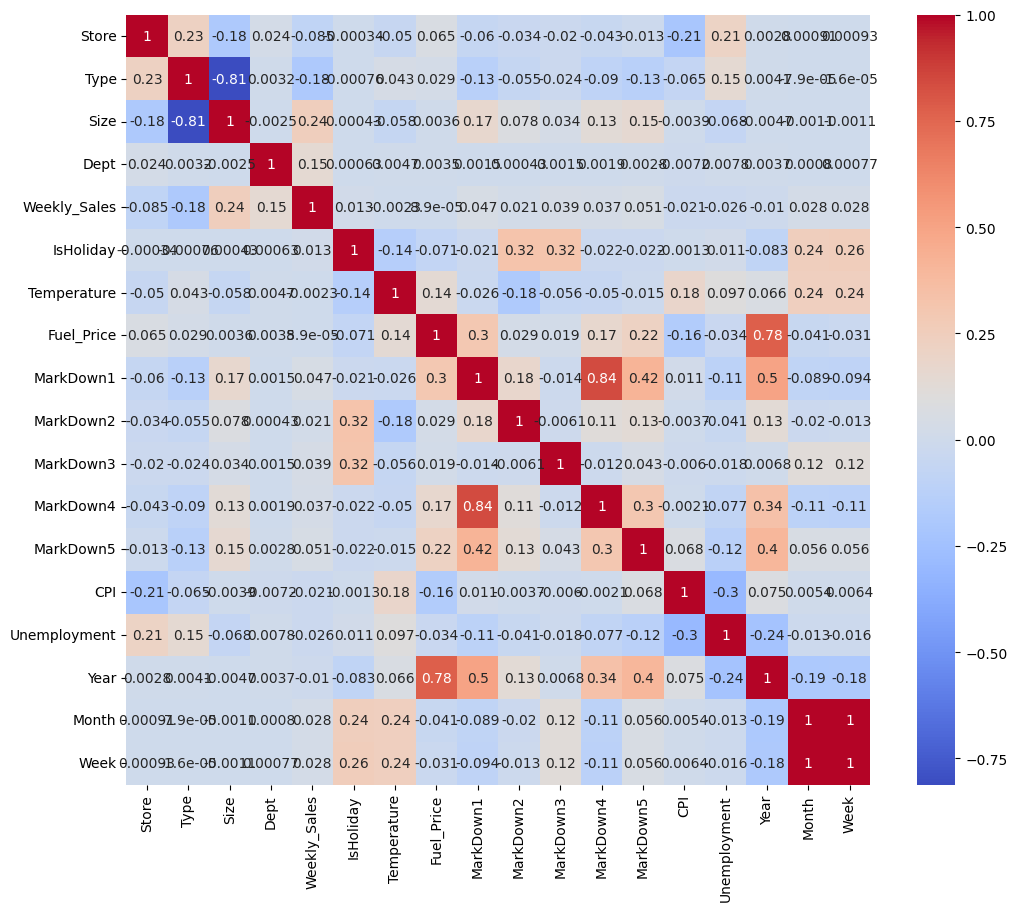

In [41]:
plt.figure(figsize = (12,10))
sns.heatmap(df1.corr(),annot=True, cmap = 'coolwarm')   # To see the correlations
plt.show()

Temperature, unemployment, CPI have no significant effect on weekly sales, so I will drop them. Also, Markdown 4 and 5 highly correlated with Markdown 1. So, I will drop them also. It can create multicollinearity problem, maybe. So, first I will try without them.

In [42]:
# Idendifying Skewness value
df1.skew()

Store            0.077947
Type             0.694646
Size            -0.326689
Dept             0.359016
Weekly_Sales     3.258942
IsHoliday        4.439407
Temperature     -0.321295
Fuel_Price      -0.104678
MarkDown1        4.730933
MarkDown2       10.649338
MarkDown3       14.908891
MarkDown4        8.075125
MarkDown5        9.952112
CPI              0.084673
Unemployment     1.183789
Year             0.056485
Month            0.040551
Week             0.052383
dtype: float64

In [43]:
from scipy.stats import skew, randint
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

In [44]:
class regression:

    def __init__(self, x, y):
        # List of regression models to be evaluated
        self.models =[('AdaBoostRegressor', AdaBoostRegressor()),
                     ('RandomForestRegressor', RandomForestRegressor()),
                     ('ExtraTreesRegressor', ExtraTreesRegressor()),
                     ('GradientBoostingRegressor', GradientBoostingRegressor()),
                     ('HistGradientBoostingRegressor', HistGradientBoostingRegressor()),
                     ('DecisionTreeRegressor', DecisionTreeRegressor()),
                     ('XGBRegressor', XGBRegressor()),
                     ('LinearRegression', LinearRegression()),
                     ('KNeighborsRegressor', KNeighborsRegressor()),
                     ('MLPRegressor', MLPRegressor()),
                     ]
        # Split the data into training and testing sets
        self.x_train, self.x_test, self.y_train,self.y_test = train_test_split(x,y,test_size=0.2, random_state = 42)

    def all_model(self):
        # Train and evaluate each model
        print(self.x_train.shape, self.x_test.shape, self.y_train.shape, self.y_test.shape)
        result = []
        for model_name, model in self.models:
            model.fit(self.x_train, self.y_train)
            y_test_pred = model.predict(self.x_test)
            y_train_pred = model.predict(self.x_train)

            data ={'Model_Name': model_name,
                    'Train_Mean_Square_Error': round(mean_squared_error(self.y_train, y_train_pred),4),
                    'Test_Mean_Square_Error': round(mean_squared_error(self.y_test, y_test_pred),4),
                    'Train_Root_Mean_Square_Error': round(np.sqrt(mean_squared_error(self.y_train, y_train_pred)),2),
                    'Test_Root_Mean_Square_Error': round(np.sqrt(mean_squared_error(self.y_test, y_test_pred)),2),
                    'Train_Mean_Absolute_Error': round(mean_absolute_error(self.y_train, y_train_pred),4),
                    'Test_Mean_Absolute_Error': round(mean_absolute_error(self.y_test, y_test_pred),4),
                    'Train_R2_Score': round(r2_score(self.y_train, y_train_pred ),4),
                    'Test_R2_Score': round(r2_score(self.y_test, y_test_pred), 4)}
            result.append(data)

        self.model_score_df = pd.DataFrame(result)

        return self.model_score_df

In [45]:
# Defining Independent and dependent variable

y = df1['Weekly_Sales']
x = df1.drop('Weekly_Sales', axis =1)

In [46]:
# Initialize and train regression models, then evaluate their performance

regression_models = regression(x,y)
r_models = regression_models.all_model()
r_models

(336169, 17) (84043, 17) (336169,) (84043,)


,Model_Name,Train_Mean_Square_Error,Test_Mean_Square_Error,Train_Root_Mean_Square_Error,Test_Root_Mean_Square_Error,Train_Mean_Absolute_Error,Test_Mean_Absolute_Error,Train_R2_Score,Test_R2_Score
0,AdaBoostRegressor,5.682339e+08,5.713914e+08,23837.66,23903.79,19728.7815,19739.0984,-0.0980,-0.1135
1,RandomForestRegressor,1.807845e+06,1.227484e+07,1344.56,3503.55,531.1781,1424.7171,0.9965,0.9761
2,ExtraTreesRegressor,5.500000e-03,1.175014e+07,0.07,3427.85,0.0003,1438.5421,1.0000,0.9771
3,GradientBoostingRegressor,1.312546e+08,1.276068e+08,11456.64,11296.32,6891.9080,6888.6309,0.7464,0.7513
4,HistGradientBoostingRegressor,4.552944e+07,4.636370e+07,6747.55,6809.09,4105.3096,4127.5349,0.9120,0.9096
5,DecisionTreeRegressor,0.000000e+00,1.970191e+07,0.00,4438.68,0.0000,1855.5966,1.0000,0.9616
6,XGBRegressor,2.572324e+07,2.765396e+07,5071.81,5258.70,2921.5677,3002.0179,0.9503,0.9461
7,LinearRegression,4.721817e+08,4.672300e+08,21729.74,21615.50,14551.3278,14589.3106,0.0876,0.0895
8,KNeighborsRegressor,2.129747e+08,3.166028e+08,14593.65,17793.34,8880.0942,10917.3047,0.5885,0.3830
9,MLPRegressor,3.860792e+08,3.808473e+08,19648.90,19515.31,11927.6329,11952.4374,0.2540,0.2578


In [47]:
# Split the dataset into training and testing sets
regression_models = regression(x,y)
x_train, x_test, y_train, y_test = regression_models.x_train, regression_models.x_test, regression_models.y_train, regression_models.y_test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((336169, 17), (84043, 17), (336169,), (84043,))

In [49]:
model = RandomForestRegressor().fit(x_train, y_train)

y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

data ={ 'Train_Mean_Square_Error': mean_squared_error(y_train, y_train_pred),
        'Test_Mean_Square_Error': mean_squared_error(y_test, y_test_pred),
        'Train_Root_Mean_Square_Error': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test_Root_Mean_Square_Error': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train_Mean_Absolute_Error': mean_absolute_error(y_train, y_train_pred),
        'Test_Mean_Absolute_Error': mean_absolute_error(y_test, y_test_pred),
        'Train_R2_Score': r2_score(y_train, y_train_pred ),
        'Test_R2_Score': r2_score(y_test, y_test_pred)}
data

{'Train_Mean_Square_Error': 1827685.0326744113,
 'Test_Mean_Square_Error': 12364705.250075232,
 'Train_Root_Mean_Square_Error': 1351.9190185341765,
 'Test_Root_Mean_Square_Error': 3516.348283386507,
 'Train_Mean_Absolute_Error': 531.6992504112516,
 'Test_Mean_Absolute_Error': 1425.9983162964197,
 'Train_R2_Score': 0.9964682334962297,
 'Test_R2_Score': 0.9759037902952465}

In [ ]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, n_iter=20)

# Fit the random search to the data
random_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_random = random_search.best_params_
best_rf_model_random = random_search.best_estimator_

# Make predictions on the test set using the best model
predictions_random = best_rf_model_random.predict(x_test)

# Evaluate the model
mse_random = mean_squared_error(y_test, predictions_random)
print("Best Parameters (RandomizedSearchCV):", best_params_random)
print("Mean Squared Error on Test Set:", mse_random)

Best Parameters (RandomizedSearchCV): {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 19, 'n_estimators': 127}
Mean Squared Error on Test Set: 142108352.1664071

In [50]:
model1 = RandomForestRegressor(max_depth=40, max_features='log2', min_samples_split=19,
                                  n_estimators=127).fit(x_train, y_train)

y_test_pred = model1.predict(x_test)
y_train_pred = model1.predict(x_train)

data1 ={ 'Train_Mean_Square_Error': mean_squared_error(y_train, y_train_pred),
        'Test_Mean_Square_Error': mean_squared_error(y_test, y_test_pred),
        'Train_Root_Mean_Square_Error': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test_Root_Mean_Square_Error': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train_Mean_Absolute_Error': mean_absolute_error(y_train, y_train_pred),
        'Test_Mean_Absolute_Error': mean_absolute_error(y_test, y_test_pred),
        'Train_R2_Score': r2_score(y_train, y_train_pred ),
        'Test_R2_Score': r2_score(y_test, y_test_pred)}
data1

{'Train_Mean_Square_Error': 85925913.75664382,
 'Test_Mean_Square_Error': 112405396.94324492,
 'Train_Root_Mean_Square_Error': 9269.623172310934,
 'Test_Root_Mean_Square_Error': 10602.141148996505,
 'Train_Mean_Absolute_Error': 5634.440726753767,
 'Test_Mean_Absolute_Error': 6543.338527966917,
 'Train_R2_Score': 0.8339592114690002,
 'Test_R2_Score': 0.7809455250319044}

#Before RandomForestRegressor Hyper tuning parameter

In [51]:
data

{'Train_Mean_Square_Error': 1827685.0326744113,
 'Test_Mean_Square_Error': 12364705.250075232,
 'Train_Root_Mean_Square_Error': 1351.9190185341765,
 'Test_Root_Mean_Square_Error': 3516.348283386507,
 'Train_Mean_Absolute_Error': 531.6992504112516,
 'Test_Mean_Absolute_Error': 1425.9983162964197,
 'Train_R2_Score': 0.9964682334962297,
 'Test_R2_Score': 0.9759037902952465}

#After RandomForestRegressor Hyper tuning parameter

In [1]:
data1

NameError: name 'data1' is not defined

In [53]:
test_data = np.array([[1, 1, 151315, 2,	0,	42.31,	2.572,	0.0,	0.0,	0.0,	0.0,	0.0,	211.096358,	8.106,	2010,	2,	5]])
print('Predicted Weekly Sales Price: $', model.predict(test_data)[0])

Predicted Weekly Sales Price: $ 48626.607999999986


In [55]:
import pickle
# Save the Random Forest model into a  pickle file
with open('Weekly Sales Price.pkl', 'wb') as file:
    pickle.dump(model, file)

In [56]:
# Load the Random Forest model from the file
with open('Weekly Sales Price.pkl', 'rb' ) as file:
    reg_model = pickle.load(file)

In [58]:
print('Predicted Weekly Sales Price: $', reg_model.predict(test_data))

Predicted Weekly Sales Price: $ [48626.608]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [59]:
import joblib

# Save the model to a compressed joblib file
joblib.dump(model, 'Weekly Sales Price.joblib.gz', compress=('gzip', 3))

['Weekly Sales Price.joblib.gz']

In [60]:
loaded_model = joblib.load('Weekly Sales Price.joblib.gz')

In [61]:
print('Predicted Weekly Sales Price: $', loaded_model.predict(test_data)[0])

Predicted Weekly Sales Price: $ 48626.607999999986
